In [3]:
import pandas as a
pizza = {'diameter' : [6, 8, 10, 14, 18],
         'harga' : [7, 9, 13, 17.5, 18]}
pizza_df = a.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


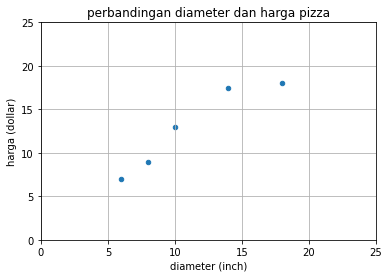

In [4]:
import matplotlib.pyplot as b
pizza_df.plot(kind = 'scatter', x = 'diameter', y = 'harga')
b.title('perbandingan diameter dan harga pizza')
b.xlabel('diameter (inch)')
b.ylabel('harga (dollar)')
b.xlim(0,25)
b.ylim(0,25)
b.grid(True)
b.show()

In [7]:
import numpy as c
x = c.array(pizza_df['diameter'])
y = c.array(pizza_df['harga'])
print(f'x : {x}')
print(f'y : {y}')

x : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 18. ]


In [8]:
x = x.reshape(-1, 1)
x.shape

(5, 1)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [11]:
x_vis = c.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(x_vis)

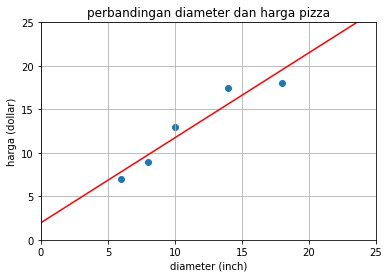

In [12]:
b.scatter(x, y)
b.plot(x_vis, y_vis, '-r')
b.title('perbandingan diameter dan harga pizza')
b.xlabel('diameter (inch)')
b.ylabel('harga (dollar)')
b.xlim(0, 25)
b.ylim(0, 25)
b.grid(True)
b.show()

In [13]:
print(f'x : \n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y : {y}')

x : 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten: [ 6  8 10 14 18]

y : [ 7.   9.  13.  17.5 18. ]


In [14]:
variance_x = c.var(x.flatten(), ddof = 1)
print(f'variance : {variance_x}')

variance : 23.2


In [15]:
c.cov(x.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [16]:
covariance_xy = c.cov(x.flatten(), y)[0][1]
print(f'covariance : {covariance_xy}')

covariance : 22.65


In [18]:
slope = covariance_xy / variance_x
print(f'slope : {slope}')

slope : 0.9762931034482758


In [19]:
intercept = c.mean(y) - slope * c.mean(x)
print(f'intercept: {intercept}')

intercept: 1.9655172413793114


In [20]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 1.965517241379315
slope : [0.9762931]


In [21]:
diameter_pizza = c.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [22]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [23]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'diameter: {dmtr} prediksi harga : {hrg}')

diameter: [12] prediksi harga : 13.681034482758621
diameter: [20] prediksi harga : 21.491379310344826
diameter: [23] prediksi harga : 24.42025862068965


In [25]:
x_train = c.array ([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = c.array ([7, 9, 13, 17.5, 18])
x_test = c.array ([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = c.array ([11, 8.5, 15, 18, 11])

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared : {r_squared}')

R-squared : 0.6620052929422553


In [28]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(x_test, y_test)])
print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [29]:
mean_y = c.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])
print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [30]:
r_squared = 1 - (ss_res / ss_tot)
print(f'R_squared : {r_squared}')

R_squared : 0.6620052929422553
